# 1. Working with Huricane Florence Tweets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
import spacy

In [41]:
stopwords = stopwords.words('english')

## 1.1 Loading Data

#### Source:  https://tags.hawksey.info/

In [42]:
tweets = pd.read_csv('./hurricane_florence_tweets.csv')
tweets.drop(['Unnamed: 0'], axis=1, inplace=True)
tweets.head()

,text
0,RT @CoinLaundryAssn: The generosity of the Wil...
1,Our team on the ground in S.C. worked with @hu...
2,"I spray myself down, over and over, practicall..."
3,RT @DE_RandyW: Update on solar in NC after #Hu...
4,RT @DE_RandyW: Update on solar in NC after #Hu...


In [43]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9759 entries, 0 to 9758
Data columns (total 1 columns):
text    9759 non-null object
dtypes: object(1)
memory usage: 76.3+ KB


In [44]:
tweets.shape

(9759, 1)

# Cleaning up Titles with Spacy
## Tokenizing, lemmatizing, stopwords

In [45]:
tweets_text=[]
for tweet in tweets.text:
    tweets_text.append(tweet)

In [46]:
tweets_text

['RT @CoinLaundryAssn: The generosity of the Williford family and other members of the self-service #laundry industry is in action right now in #NorthCarolina helping those affected by #HurricaneFlorence2018 The FCLA has committed to #donating funds to help cover the costs of the food. https://t.co/ZBjAFCDeK0',
 'Our team on the ground in S.C. worked with @humanesociety and Horry Co. authorities to pull two young bulls and a heifer out of a flooded farm today. We are so grateful for the work they are doing for the animals. #InspireCompassion #HurricaneFlorence2018 https://t.co/c7MVgmue2H',
 "I spray myself down, over and over, practically bathing in bug repellent and yet I'm still a piece of meat walking around outside trying to cleanup this mess. I'm tired of mosquitoes biting me! #newbernnc #florenceNC #florence2018 #HurricaneFlorence2018",
 'RT @DE_RandyW: Update on solar in NC after #HurricaneFlorence2018\n20 distribution-connected projects offline\n6 - Due to @Dukeenergy (upstream

In [49]:
len(tweets_text)

9759

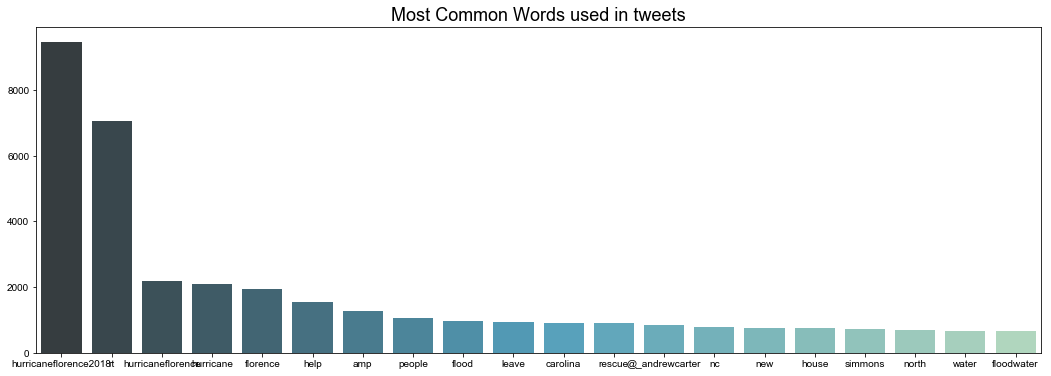

In [51]:
import spacy
nlp = spacy.load('en_core_web_sm')
punctuations = string.punctuation

#Function to clean up text
def cleanup_text(docs, logging=False):
    texts = []
    counter = 1
    for doc in docs:
        if counter % 1000 == 0 and logging:
            print("Processed %d out of %d documents." % (counter, len(docs)))
        counter += 1
        doc = nlp(doc, disable=['parser', 'ner']) #disabling default models of spacy
        tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']  #Applyint tokenizing and lemmatizing
        tokens = [tok for tok in tokens if tok not in stopwords and tok not in punctuations] #Removing stopwords and punctuations
        tokens = ' '.join(tokens) 
        texts.append(tokens)  #Appending clean titles to texts list
    return pd.Series(texts)   #Returning texts list as pd Series

tweets_clean= cleanup_text(tweets_text)
tweets_clean = ' '.join(tweets_clean).split()

tweets_counts = Counter(tweets_clean)

tweets_common_words = [word[0] for word in tweets_counts.most_common(20)]
tweets_common_counts = [word[1] for word in tweets_counts.most_common(20)]
fig = plt.figure(figsize=(18,6))
sns.barplot(x=tweets_common_words, y=tweets_common_counts, palette = "GnBu_d")
sns.set(font_scale=1.5, rc={'figure.figsize':(8, 8)})
plt.title('Most Common Words used in tweets')
plt.show()


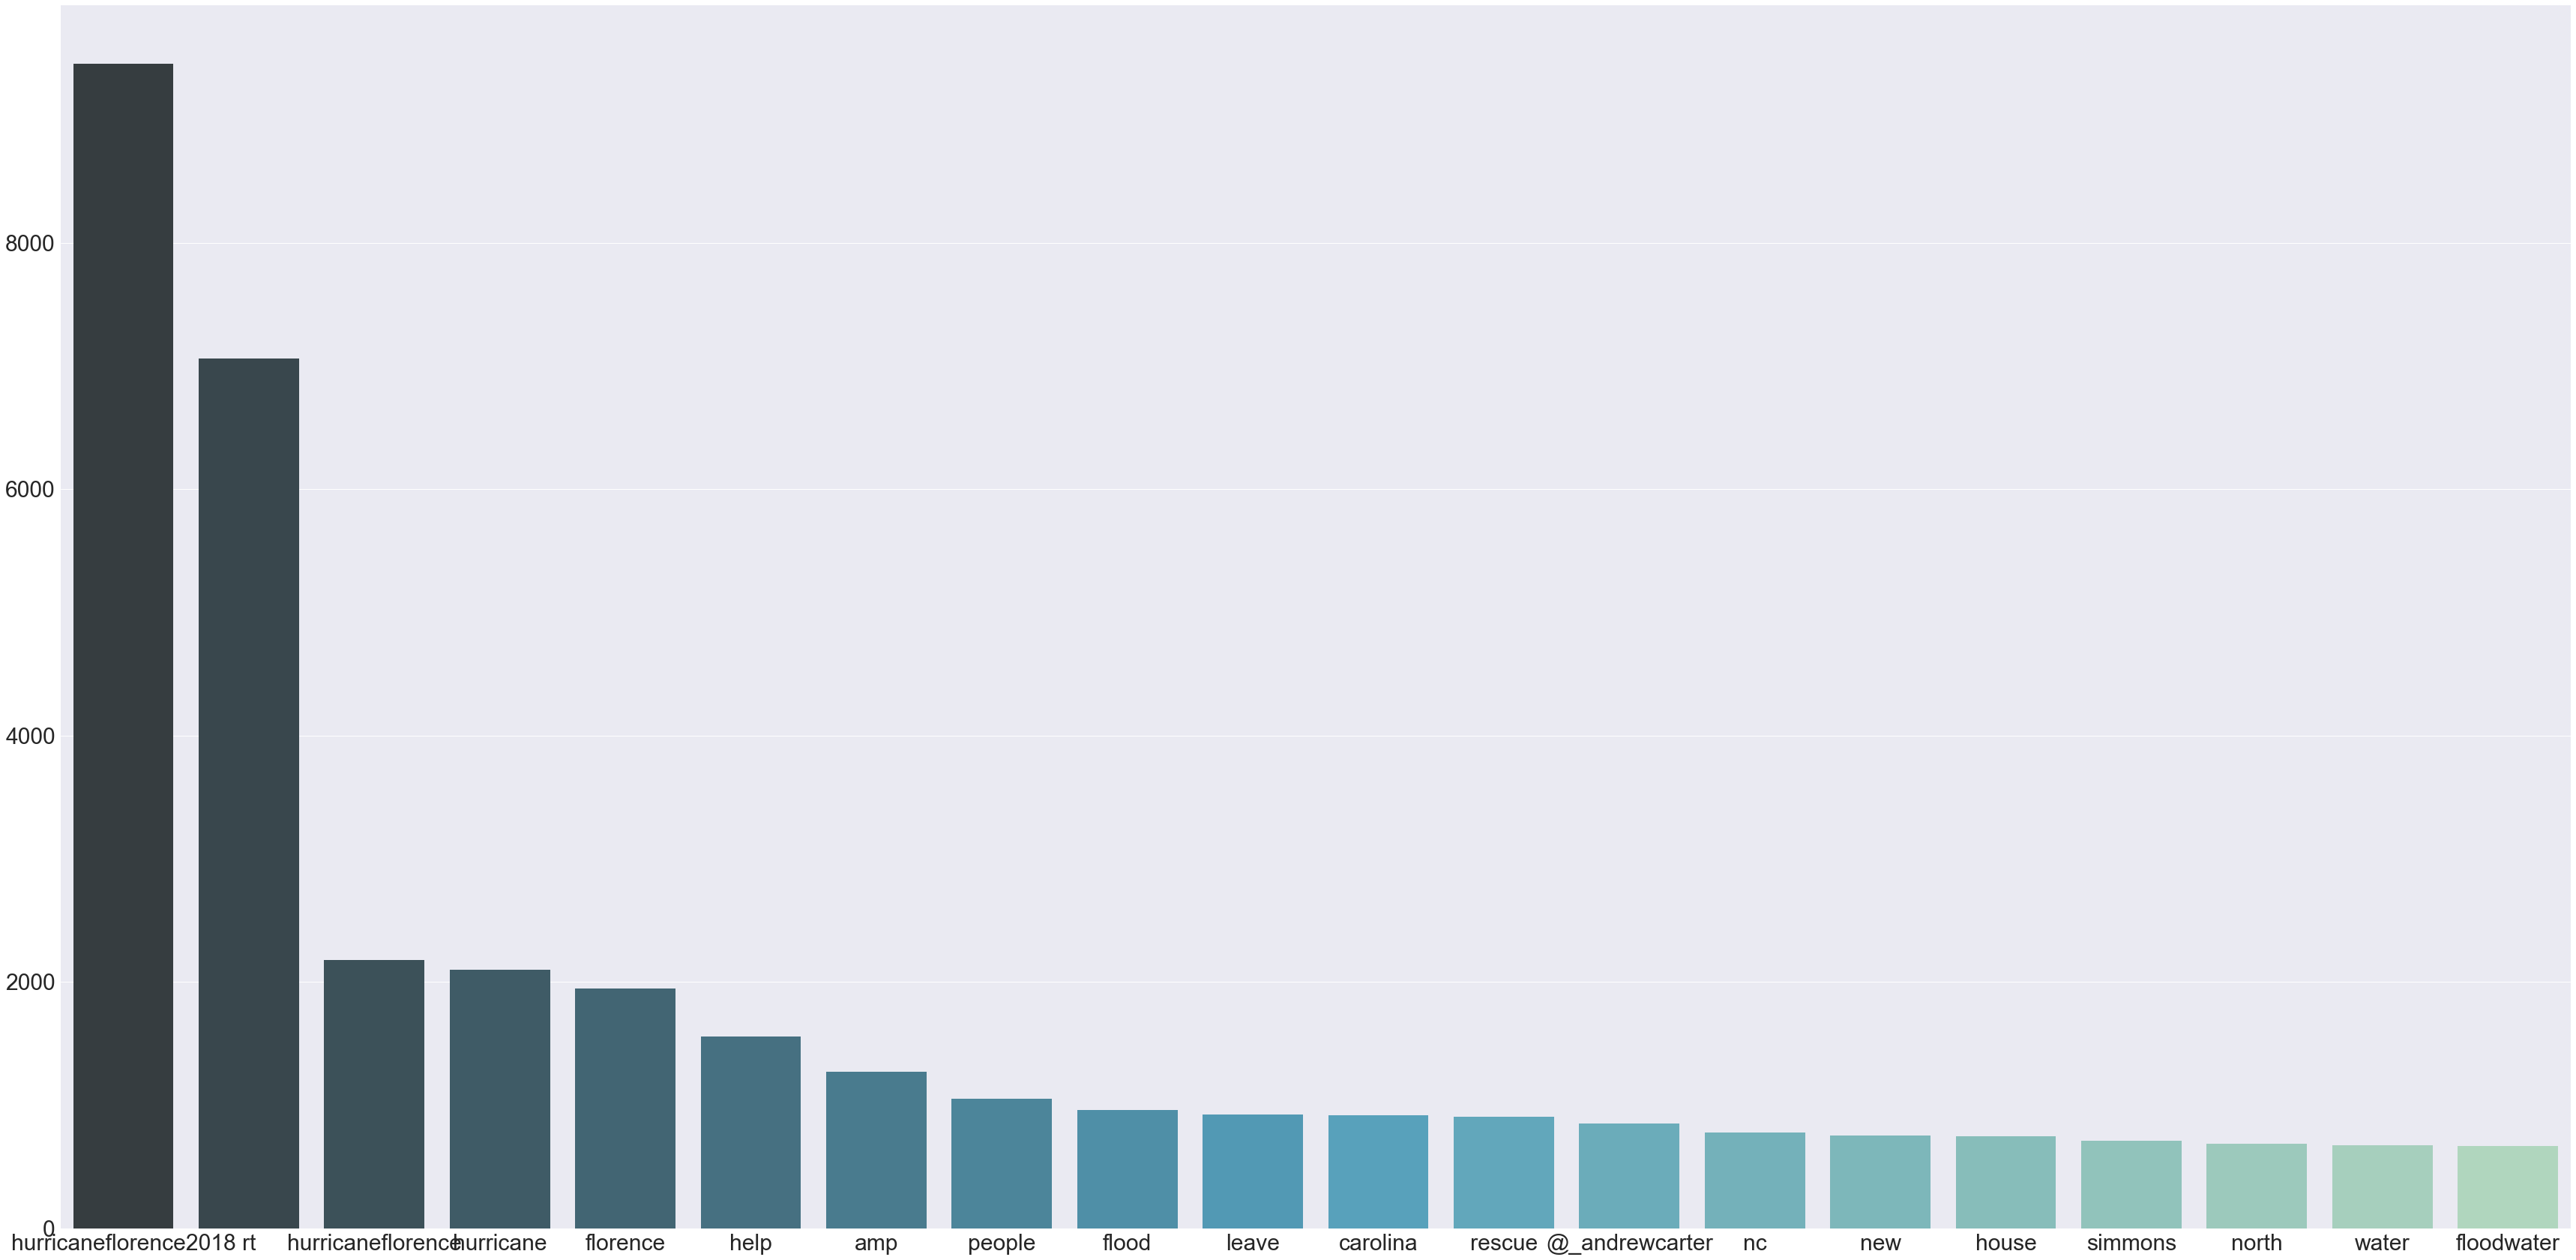

In [109]:
fig = plt.figure(figsize=(60,30))
sns.barplot(x=tweets_common_words, y=tweets_common_counts, palette = "GnBu_d")
sns.set(font_scale=2)
#plt.title('Most Common Words used in tweets', font:{'fontsize': rcParams['axes.titlesize']})
#plt.figtext(.5,.9,'Most Common Words Used in Tweets', fontsize=60, ha='center')
plt.tick_params(axis = 'both', which = 'major', labelsize = 30)
plt.show()


In [34]:
len(tweets_clean)

186021

In [35]:
# Let's come up with a list of emergency work and permanent work
emergency_work = ['debris', 'removal', 'junk', 'waste', 'property', 'tree', 'private', 'cubic', 'yard', 'creek',
                  'removal', 'temporary', 'roads', 'levees', 'unsafe', 'structures', 'in-water', 'vegetation', 'floodplains',
                  'critical habitat', 'evacuation', 'shelter', 'emergency', 'transport', 'access', 'safe', 'rescue',
                  'barricades', 'fire', 'generator', 'safety', 'hazard', 'mud', 'silt']
permanent_work = ['bridge', 'waterways', 'facility', 'utilities', 'park', 'traffic signal', 'replacement', 'control',
                  'repairs', 'stabilization', 'remediation', 'surfaces', 'bases', 'shoulders', 'ditches', 'drainage',
                  'sidewalk', ' guardrails', 'signs', 'Decking', 'Pavement', 'Channel alignment', 'irrigation', 'erosion',
                  'prevention', 'Dams', 'reservoirs', 'basins ', 'canals', 'aqueducts', 'coastal', 'shoreline', 'pumping',
                  'building', 'mechanical', 'electrical', 'basement', 'first floor flooding', 'painting', ' treatment plants',
                  'power', 'transmission', 'natural gas', 'sewage', 'permanent', 'restoration', 'communication', 'systems',
                  'Inspection', 'assessment', 'beach', 'park',  'playground', 'pool', 'docks', 'golf', 'tennis',
                  'ball', 'port', 'harbor', 'fish', 'hatcheries', 'insurance']

In [36]:
num_emergency_words = 0
for i in tweets_clean:
 if i in emergency_work:
    num_emergency_words += 1

In [37]:
num_permanent_work_words = 0
for i in tweets_clean:
 if i in permanent_work:
    num_permanent_work_words += 1

In [38]:
num_words = len(tweets_clean)
percent_emergency = num_emergency_words / num_words
percent_emergency

0.009509679014734896

In [39]:
percent_permanten_work = num_permanent_work_words / num_words
percent_permanten_work

0.005106950290558593

# NLP 

In [14]:
# Replacing Type Values for Numbers in Train 
train.type.replace(['flood', 'tornado', 'earthquake', 'huricane'], [0, 1, 2, 3], inplace=True)
train.head()

/Users/belensanchez/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5886: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,tweet,type
1942,Queensland flood maps http://t.co/h0wQtPOp via...,0
1647,Flood death toll rises as man's body found: TH...,0
2893,http://t.co/YOrqO568 Qld in grip of new deadly...,0
1700,BHP donates $1million to QLD flood appeal | Mi...,0
5290,Watchin CNN this tornado shit crazy!,1


In [15]:
# Replacing Type Values for Numbers in Test
test.type.replace(['flood', 'tornado', 'earthquake', 'huricane'], [0, 1, 2, 3], inplace=True)
test.head()

/Users/belensanchez/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5886: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,tweet,type
5402,tornado could be embedded in rain in Pawhuska....,1
263,#Everest climbers in camp 1 survived but route...,2
6021,@katiekathleen tornado face indeed!,1
5217,#Joplin theres is no way to describe this.,1
2526,RT @sunriseon7: More images from the Queenslan...,0


In [16]:
#From Train and Test Sets, separate Xs and ys

X_train = train['tweet'].tolist()
y_train = train['type'].tolist()

X_test = test['tweet'].tolist()
y_test = test['type'].tolist()

print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

4357 4357
2146 2146


In [17]:
X_train_clean = cleanup_text(X_train)
X_test_clean = cleanup_text(X_test)
print(len(X_train_clean), len(y_train))
print(len(X_test_clean), len(y_test))

4357 4357
2146 2146


# Applying Count Vectorizer

In [18]:
#Vectorizing train data
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 10000) 

# fit_transform() training data
X_train_clean_vectorized = vectorizer.fit_transform(X_train_clean)

# Numpy arrays are easy to work with, so convert the result to an 
X_train_clean_vectorized = X_train_clean_vectorized.toarray()

In [19]:
#By checking the length of get_feature_names, we can see that we’re working with 6846 features.
len(vectorizer.get_feature_names())

8775

In [27]:
X_train_clean_vectorized

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

- The entries in this matrix are the number of times each word appears in each document. Because the number of words in the vocabulary is so much larger than the number of words that might appear in a single text, most entries of this matrix are zero.

# Logistic Regression

In [28]:
#Trying Vectorized features on Log Reg

In [29]:
#Logistic Regression 
from sklearn.linear_model import LogisticRegression
#Instantiate model
log_reg = LogisticRegression()

In [30]:
#Fit model on Log Reg for X_train with title vectorized
log_reg.fit(X_train_clean_vectorized, y_train)
#Score on training set
print(log_reg.score(X_train_clean_vectorized, y_train))


0.9990819371126922


In [35]:
#Predictions
from sklearn.metrics import roc_auc_score
pred_log_reg_vect = log_reg.predict(vectorizer.transform(X_test_clean))

In [36]:
#Mean accuracy on train data
log_reg.score(X_train_clean_vectorized, y_train)

0.9990819371126922

In [37]:
#Mean accuracy on test data
log_reg.score(vectorizer.transform(X_test_clean), y_test)

0.9739049394221808

In [39]:
feature_names = np.array(vectorizer.get_feature_names())
sorted_coef_index = log_reg.coef_[0].argsort()
print('Smallest Coefs: \n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}\n'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs: 
['nepal' 'nepalearthquake' 'tornado' 'https' 'nepalquake' 'prayfornepal'
 'kathmandu' 'rt' 'sandy' 'earthquake']

Largest Coefs: 
['flood' 'relevant' 'queensland' 'australia' 'bigwet' 'water' 'power'
 'brisbane' 'qld' 'river']



-  VERIFY INTERPRETATION WITH FARSHAD SINCE WE HAVE 4 CATEGORIES
- Sorting the ten smallest and ten largest coefficients, we can see the model has predicted words like “history”, “historical” and “ancient” to posts on the subreddit history, and words like “reddit”, “serious”, and “redditor” to posts on the subreddit AskReddit.

## Applying TFID Vectorizer

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid_vect = TfidfVectorizer(min_df = 5, ngram_range = (1,2)).fit(X_train_clean)  #min_df reduces num of words that do not appear more than 5 times in a doc
len(tfid_vect.get_feature_names())

2345

In [44]:
X_train_tfid_vectorized = tfid_vect.transform(X_train_clean)
log_reg = LogisticRegression()
log_reg.fit(X_train_tfid_vectorized, y_train)
pred_log_reg_tfid = log_reg.predict(tfid_vect.transform(X_test_clean))

In [45]:
#Mean accuracy on train data
print(log_reg.score(X_train_tfid_vectorized, y_train))

0.970621987606151


In [46]:
#Mean accuracy on test data
log_reg.score(tfid_vect.transform(X_test_clean), y_test)

0.9627213420316869

In [ ]:
- We reduced the number of words form 8775 to 2345, however our AUC score did not changed much.

In [47]:
feature_names = np.array(tfid_vect.get_feature_names())
sorted_tfidf_index = X_train_tfid_vectorized.max(0).toarray()[0].argsort()
print('Smallest Tfidf: \n{}\n'.format(feature_names[sorted_tfidf_index[:10]]))
print('Largest Tfidf: \n{}\n'.format(feature_names[sorted_tfidf_index[:-11:-1]]))

Smallest Tfidf: 
['ezj' 'ly ezj' 'tour bushfir' 'mp suggest' 'bushfir' 'pm tour'
 'face tweet' 'queensland pm' 'queensland today' 'sure remind']

Largest Tfidf: 
['new' 'along' 'ok' 'tornado' 'rt' 'okwx' 'park' 'relevant' 'arwx'
 'prayfornepal']



- We are able to see a list of features with the smallest tf-idf that either commonly appeared across all reviews or only appeared rarely in very long reviews and a list of features with the largest tf–idf, that contains words which appeared frequently in a review, but did not appear commonly across all reviews.

## Testing the model